### Import packages

In [82]:
import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np
import math
import pickle
import folium
import json

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from xgboost import XGBClassifier


from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, BayesianRidge, Ridge
from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Modeling

### Load Data

In [32]:
df_train = pd.read_csv('../data/train_labels_final.csv')
df_train = df_train.drop('Unnamed: 0',axis=1)
df_train

,cell_id,dates,value,neighbor_1,neighbor_2,neighbor_3,neighbor_4,neighbor_5,neighbor_6,neighbor_7,...,neighbor_14,neighbor_15,neighbor_16,neighbor_17,neighbor_18,neighbor_19,neighbor_20,latitude,longitude,region
0,00c4db22-a423-41a4-ada6-a8b1b04153a4,2013-01-01,12.7,2.0,1.6,6.4,3.2,2.7,2.0,2.8,...,6.6,10.60,8.4,2.88,4.10,7.24,4.00,-121.9,41.2,other
1,018cf1a1-f945-4097-9c47-0c4690538bb5,2013-01-01,20.4,2.0,1.6,6.4,3.2,2.7,2.0,2.8,...,10.6,6.60,8.4,2.88,4.10,7.24,4.00,-120.6,39.7,sierras
2,01be2cc7-ef77-4e4d-80ed-c4f8139162c3,2013-01-01,37.0,2.0,1.6,6.4,3.2,2.7,2.0,2.8,...,10.6,6.60,8.4,2.88,7.24,4.10,4.00,-119.6,38.3,sierras
3,02c3ec4a-8de4-4284-9ec1-5a942d3d098e,2013-01-01,2.3,2.0,1.6,3.2,6.4,2.7,2.0,2.8,...,5.9,4.10,4.0,3.40,2.60,2.30,7.20,-107.2,44.6,other
4,02cf33c2-c8e2-48b9-bf72-92506e97e251,2013-01-01,8.0,2.0,1.6,3.2,6.4,2.7,2.0,2.8,...,5.9,4.10,4.0,3.40,2.60,2.30,10.60,-106.6,40.4,central rockies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50453,fd4492f2-8aa9-4279-bdc0-73991786943f,2019-12-31,1.3,1.3,2.7,6.7,4.0,2.1,1.5,2.8,...,9.9,5.30,6.9,3.70,3.90,1.50,9.93,-105.1,38.9,central rockies
50454,fde3221a-9ce3-45a9-857f-bd196b07aa05,2019-12-31,5.6,1.3,2.7,6.7,4.0,2.1,1.5,2.8,...,9.9,5.30,6.9,3.70,3.90,1.50,9.93,-106.1,39.3,central rockies
50455,fdeb8912-f9d1-445d-aadb-e943534f67fe,2019-12-31,8.8,1.3,2.7,6.7,4.0,2.1,1.5,2.8,...,9.9,5.30,6.9,3.70,9.93,3.90,1.50,-107.9,37.8,central rockies
50456,fe33672e-7ea7-4c5d-8639-96b2cc7edb0c,2019-12-31,2.9,1.3,2.7,4.0,6.7,2.1,1.5,2.8,...,4.1,9.93,5.3,10.92,6.90,3.70,6.00,-122.0,43.9,other


In [35]:
#Make sure our data types is correct
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50458 entries, 0 to 50457
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cell_id      50458 non-null  object 
 1   dates        50458 non-null  object 
 2   value        50458 non-null  float64
 3   neighbor_1   50458 non-null  float64
 4   neighbor_2   50458 non-null  float64
 5   neighbor_3   50458 non-null  float64
 6   neighbor_4   50458 non-null  float64
 7   neighbor_5   50458 non-null  float64
 8   neighbor_6   50458 non-null  float64
 9   neighbor_7   50458 non-null  float64
 10  neighbor_8   42424 non-null  float64
 11  neighbor_9   43759 non-null  float64
 12  neighbor_10  47152 non-null  float64
 13  neighbor_11  49849 non-null  float64
 14  neighbor_12  50458 non-null  float64
 15  neighbor_13  50458 non-null  float64
 16  neighbor_14  50458 non-null  float64
 17  neighbor_15  50458 non-null  float64
 18  neighbor_16  50458 non-null  float64
 19  neig

In [54]:
df_train.isna().sum()/len(df_train)

cell_id        0.000000
dates          0.000000
value          0.000000
neighbor_1     0.000000
neighbor_2     0.000000
neighbor_3     0.000000
neighbor_4     0.000000
neighbor_5     0.000000
neighbor_6     0.000000
neighbor_7     0.000000
neighbor_8     0.159222
neighbor_9     0.132764
neighbor_10    0.065520
neighbor_11    0.012069
neighbor_12    0.000000
neighbor_13    0.000000
neighbor_14    0.000000
neighbor_15    0.000000
neighbor_16    0.000000
neighbor_17    0.000000
neighbor_18    0.000000
neighbor_19    0.000000
neighbor_20    0.000000
latitude       0.000000
longitude      0.000000
region         0.000000
dtype: float64

## Train-test-split

Let's do our train-test-split before we begin to build our pipelines.

In [33]:
X_train = df_train.drop(['cell_id','dates','value'],axis=1)
y_train = df_train['value']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Modeling EDA

<AxesSubplot:>

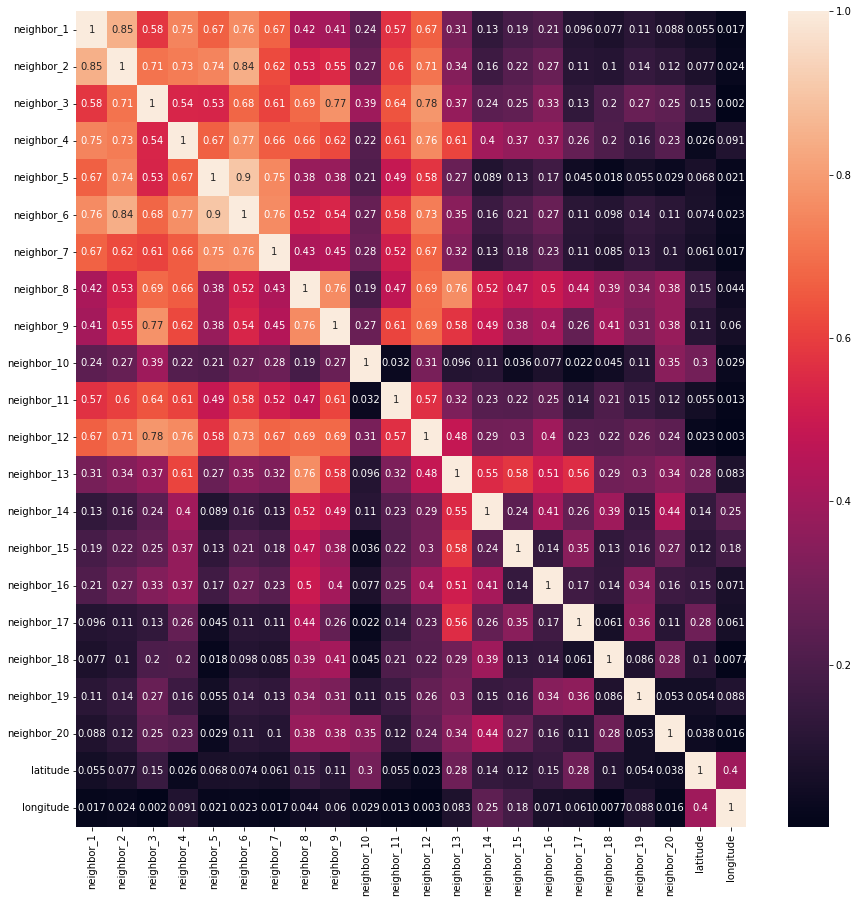

In [34]:
fig, ax = plt.subplots(figsize = (15,15))

sns.heatmap(abs(X_train.corr()),annot=True, ax=ax)

It seems like our top 13 nearest neighbors of ground measured stations are highly correlated. This is possibly because top 13 nearest stations to the grid cell is also near to each other in distance and therefore, the SWE values of the top 13 nearest neighbors are correlated to each other by distance. To reduce the multicollinearity between these stations, we can perform PCA on the first 13 neighbors as part of our pipeline.

## Modeling Building

We are going to begin our model testing with our training data. We will be using pipelines functions, and Function transformers to smooth our model building process and ensure no data leakage takes place in our workflow.

### Functions

In [36]:
def grab_numeric(df):
    
    """
    Helper function to grab only numeric columns from our dataframe.
    """
    return df.select_dtypes(include=['float', 'int'])

In [37]:
def grab_object(df):
    
    """
    Helper function to grab only categorical columns from our dataframe.
    """
    
    return df.select_dtypes(include=['object'])

In [79]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=5):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} R_squared
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

Some of these models take a very long time to run. The function below will pickle the models we have to [pickled_models](link).

In [40]:
def pickle_model (model,model_file_name):
    
    """
    This helper function takes in your model and save it under modelname, in a folder parallel to the parent director called
    pickled_models.
    
    model: the model to save.
    model_file_name: (str) file name to save the model as. 
    """
    print (f'Saving model as {model_file_name}...')
    pickle.dump(model,open(f'./pickled_models/{model_file_name}.sav','wb'))
    print(f'{model_file_name} succesfully saved.')
           
    
    

In [41]:
def load_pickle(fullfilepath):
    
    file = open(fullfilepath,'rb')
    object_file = pickle.load(file)
    file.close()
    
    return object_file

#### Testing functions

In [43]:
#Sniff test, ensuring function outputs what we want

num_df=grab_numeric(df_train)
num_df

,value,neighbor_1,neighbor_2,neighbor_3,neighbor_4,neighbor_5,neighbor_6,neighbor_7,neighbor_8,neighbor_9,...,neighbor_13,neighbor_14,neighbor_15,neighbor_16,neighbor_17,neighbor_18,neighbor_19,neighbor_20,latitude,longitude
0,12.7,2.0,1.6,6.4,3.2,2.7,2.0,2.8,NaN,3.7,...,5.9,6.6,10.60,8.4,2.88,4.10,7.24,4.00,-121.9,41.2
1,20.4,2.0,1.6,6.4,3.2,2.7,2.0,2.8,NaN,3.7,...,5.9,10.6,6.60,8.4,2.88,4.10,7.24,4.00,-120.6,39.7
2,37.0,2.0,1.6,6.4,3.2,2.7,2.0,2.8,NaN,3.7,...,5.9,10.6,6.60,8.4,2.88,7.24,4.10,4.00,-119.6,38.3
3,2.3,2.0,1.6,3.2,6.4,2.7,2.0,2.8,6.6,3.7,...,4.3,5.9,4.10,4.0,3.40,2.60,2.30,7.20,-107.2,44.6
4,8.0,2.0,1.6,3.2,6.4,2.7,2.0,2.8,6.6,3.7,...,4.3,5.9,4.10,4.0,3.40,2.60,2.30,10.60,-106.6,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50453,1.3,1.3,2.7,6.7,4.0,2.1,1.5,2.8,4.1,6.1,...,5.5,9.9,5.30,6.9,3.70,3.90,1.50,9.93,-105.1,38.9
50454,5.6,1.3,2.7,6.7,4.0,2.1,1.5,2.8,4.1,6.1,...,5.5,9.9,5.30,6.9,3.70,3.90,1.50,9.93,-106.1,39.3
50455,8.8,1.3,2.7,6.7,4.0,2.1,1.5,2.8,6.1,7.1,...,5.5,9.9,5.30,6.9,3.70,9.93,3.90,1.50,-107.9,37.8
50456,2.9,1.3,2.7,4.0,6.7,2.1,1.5,2.8,7.1,6.1,...,9.9,4.1,9.93,5.3,10.92,6.90,3.70,6.00,-122.0,43.9


In [44]:
#Sniff test, ensuring function outputs what we want

cat_df = grab_object(df_train)
cat_df.head()

,cell_id,dates,region
0,00c4db22-a423-41a4-ada6-a8b1b04153a4,2013-01-01,other
1,018cf1a1-f945-4097-9c47-0c4690538bb5,2013-01-01,sierras
2,01be2cc7-ef77-4e4d-80ed-c4f8139162c3,2013-01-01,sierras
3,02c3ec4a-8de4-4284-9ec1-5a942d3d098e,2013-01-01,other
4,02cf33c2-c8e2-48b9-bf72-92506e97e251,2013-01-01,central rockies


#### Building function transformers

In [48]:
GrabNumeric = FunctionTransformer(grab_numeric)
GrabObject = FunctionTransformer(grab_object)

### Building `subpipelines` and `Column Transformer`

In [83]:
# We'll throw these mini-pipelines into our ColumnTransformer: numeric and categorical

subpipe_num_imputed= Pipeline(steps=[('get_num', GrabNumeric),
                              ('ss', StandardScaler()),
                              ('num_impute', IterativeImputer(skip_complete=True,random_state=250))
                             ])

subpipe_num = Pipeline(steps=[('get_num', GrabNumeric),
                              ('ss', StandardScaler())
                             ])


subpipe_cat = Pipeline(steps=[('get_obj', GrabObject),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
                              ])

In [84]:
ct = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_num, X_train.columns),
    ('subpipe_cat', subpipe_cat, X_train.columns)
])

ct_imputed = ColumnTransformer(transformers = [
    ('subpipe_num_imputed', subpipe_num_imputed, X_train.columns),
    ('subpipe_cat', subpipe_cat, X_train.columns)
])


### Dummy Model

In [85]:
#Build a dummy model pipeline

dummy_model_pipe = Pipeline(steps=[
    ('ct_imputed',ct_imputed),
    ('dummy_mod',DummyRegressor())
])

dummy_model = dummy_model_pipe.fit(X_train,y_train)

In [86]:
dummy_model.score(X_train,y_train)

0.0

In [87]:
dummy_pipe = ModelWithCV(dummy_model_pipe,model_name = 'dummy_mod', X=X_train,y=y_train)

In [88]:
dummy_pipe.print_cv_summary()

CV Results for `dummy_mod` model:
            -0.09730 ± 0.16507 R_squared
        


### HistGradientBoostingRegressor

#### Defaults

In [102]:
hist_model_pipe = Pipeline(steps=[
    ('ct',ct),
    ('hist_GBR',HistGradientBoostingRegressor(random_state=42, scoring='r2', categorical_features = [22,23,24],max_bins=2))
])

hist_model = hist_model_pipe.fit(X_train,y_train)

In [103]:
hist_pipe = ModelWithCV(hist_model_pipe,model_name = 'hist_GBR', X=X_train,y=y_train)

In [104]:
hist_pipe.print_cv_summary()

CV Results for `hist_GBR` model:
            0.06964 ± 0.14258 R_squared
        


This model is overfit, lets see if we can 

In [97]:
X_train.shape

(50458, 23)

#### GridSearch

    'hist_GBR__l2_regularization':[0.01, 0.05, 0.1]

In [105]:
histGBR_grid_params = {
    'hist_GBR__learning_rate':[0.5,0.7], 
    'hist_GBR__max_iter':[50,500, 1000],  
    'hist_GBR__max_depth':[100,1000], 
    'hist_GBR__min_samples_leaf':[100,500],
    'hist_GBR__validation_fraction':[0.2],
}

hist_grid = GridSearchCV(hist_model_pipe, histGBR_grid_params)

hist_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('get_num',
                                                                                          FunctionTransformer(func=<function grab_numeric at 0x000001FE0C5A8160>)),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['neighbor_1', 'neighbor_2', 'neighbor_3', 'neighbor_4', 'neighbor_5',
       'neighbor_6', 'neighbor_7', 'neighbor_8', 'neighbor_9', 'neighbor_1...
       'neighbor_19', 'neighbor_20', 'latitude', 'longitude', 'region'],
      dtype='object'))])),
                                       ('hist_GBR',
              

### 